<a href="https://colab.research.google.com/github/vinit6085903/anpr/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
ticker = "GC=F"
start_date = "2000-01-01"
end_date = datetime.now().strftime('%Y-%m-%d')
print(f"Downloading Gold Data from {start_date} to {end_date}...")
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
data = data.dropna()
print("\nTop 5 Rows (Jan 2000):")
print(data.head())
print("\nLast 5 Rows (Recent):")
print(data.tail())
print(f"\nTotal Trading Days: {len(data)}")
filename = "gold_price_2000_2026.csv"
data.to_csv(filename)
print(f"\nSuccess! Dataset saved as '{filename}'")

/tmp/ipython-input-1726750157.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


Top 5 Rows (Jan 2000):
Price            Close        High         Low        Open Volume
Ticker            GC=F        GC=F        GC=F        GC=F   GC=F
Date                                                             
2000-08-30  273.899994  273.899994  273.899994  273.899994      0
2000-08-31  278.299988  278.299988  274.799988  274.799988      0
2000-09-01  277.000000  277.000000  277.000000  277.000000      0
2000-09-05  275.799988  275.799988  275.799988  275.799988      2
2000-09-06  274.200012  274.200012  274.200012  274.200012      0

Last 5 Rows (Recent):
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2026-01-12  4604.299805  4620.000000  4577.799805  4579.100098    156
2026-01-13  4589.200195  4617.100098  4578.600098  4578.600098    239
2026-01-14  4626.299805  4635.000000  4608.200195  4610.299805   1313
2026-

In [5]:
import pandas as pd
import numpy as np
# Read the CSV with multi-level headers
df = pd.read_csv('gold_price_2000_2026.csv', index_col=0, parse_dates=True, header=[0, 1])

df_processed = pd.DataFrame(index=df.index)

df_processed['Close'] = df[('Close', 'GC=F')]

df_processed['EMA_50'] = df_processed['Close'].ewm(span=50, adjust=False).mean()
df_processed['EMA_200'] = df_processed['Close'].ewm(span=200, adjust=False).mean()

def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


df_processed['RSI'] = calculate_rsi(df_processed['Close'])

df_processed.dropna(inplace=True)

print("New Data with Indicators:")
print(df_processed[['Close', 'EMA_50', 'EMA_200', 'RSI']].tail(10))

df_processed.to_csv('gold_data_with_indicators.csv')
print("\nFile saved: 'gold_data_with_indicators.csv'")

New Data with Indicators:
                  Close       EMA_50      EMA_200        RSI
Date                                                        
2026-01-05  4436.899902  4200.129666  3678.037980  60.044039
2026-01-06  4482.200195  4211.191255  3686.039594  62.192577
2026-01-07  4449.299805  4220.528845  3693.634223  59.648170
2026-01-08  4449.700195  4229.515957  3701.157268  57.219559
2026-01-09  4490.299805  4239.742775  3709.009432  60.183666
2026-01-12  4604.299805  4254.039129  3717.917794  64.588574
2026-01-13  4589.200195  4267.182700  3726.587271  59.458406
2026-01-14  4626.299805  4281.265724  3735.539635  59.399976
2026-01-15  4616.299805  4294.404315  3744.303417  58.799098
2026-01-16  4588.399902  4305.933554  3752.702387  53.950687

File saved: 'gold_data_with_indicators.csv'


Data Loaded. Columns: Index(['Close', 'EMA_50', 'EMA_200', 'RSI'], dtype='object')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Training Start... (Thoda time lagega)
Epoch 1/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 0.0076
Epoch 2/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 4.6629e-04
Epoch 3/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 3.7301e-04
Epoch 4/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - loss: 3.1462e-04
Epoch 5/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 3.1384e-04
Epoch 6/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 2.9269e-04
Epoch 7/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 2.3485e-04
Epoch 8/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 2.0443e-04
Epoch 9/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - loss: 1.9282e-04
Epoch 10/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 2.0422e-04
Epoch 11/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 1.7488e-04
Epoch 12/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 1.5080e-04
Epoch 13/25
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4802e-04
Epoch 14/25


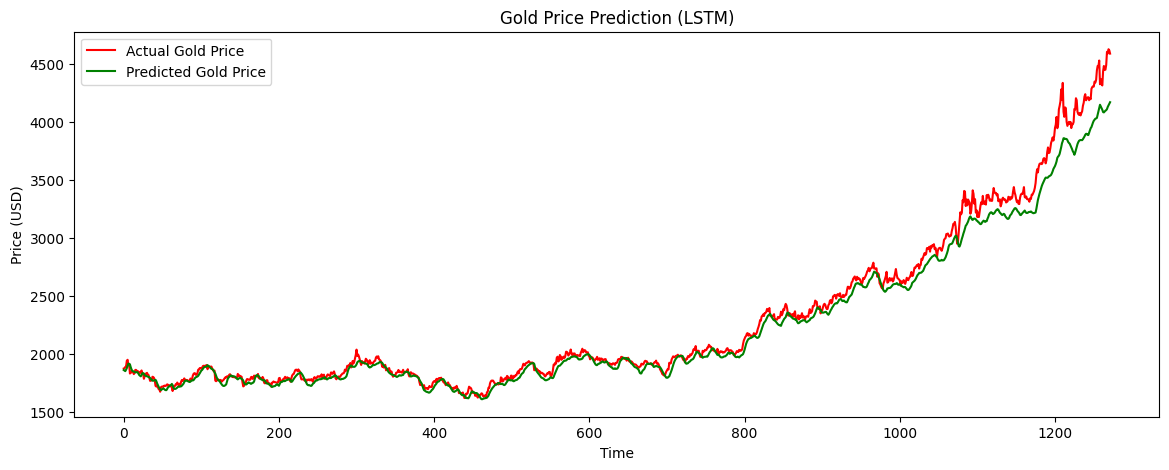

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_csv('gold_data_with_indicators.csv', index_col='Date', parse_dates=True)

print("Data Loaded. Columns:", df.columns)

features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
data = df[features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
prediction_days = 60

X_train = []
y_train = []


train_size = int(len(scaled_data) * 0.8)

for i in range(prediction_days, train_size):

    X_train.append(scaled_data[i-prediction_days:i])

    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))


model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Model Training Start... (Thoda time lagega)")

model.fit(X_train, y_train, epochs=25, batch_size=32)

print("Training Complete!")


test_data = scaled_data[train_size - prediction_days:]
X_test = []
y_test = data[train_size:, 0]

for i in range(prediction_days, len(test_data)):
    X_test.append(test_data[i-prediction_days:i])

X_test = np.array(X_test)


predicted_prices = model.predict(X_test)



scaler_prediction = MinMaxScaler()
scaler_prediction.min_, scaler_prediction.scale_ = scaler.min_[0], scaler.scale_[0]
predicted_prices = scaler_prediction.inverse_transform(predicted_prices)

plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Actual Gold Price')
plt.plot(predicted_prices, color='green', label='Predicted Gold Price')
plt.title('Gold Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [7]:

last_60_days = df[features].tail(60).values

last_60_days_scaled = scaler.transform(last_60_days)

X_future = []
X_future.append(last_60_days_scaled)
X_future = np.array(X_future)
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 4))


pred_price_scaled = model.predict(X_future)

dummy_array = np.zeros((1, 4))
dummy_array[0, 0] = pred_price_scaled
pred_price_actual = scaler.inverse_transform(dummy_array)[0, 0]

print("\n--------------------------------------------------")
print(f"Predicted Gold Price for Next Trading Day: ${pred_price_actual:.2f}")
print("--------------------------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

--------------------------------------------------
Predicted Gold Price for Next Trading Day: $4176.50
--------------------------------------------------


/tmp/ipython-input-2513203901.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dummy_array[0, 0] = pred_price_scaled # Pehle column me predicted price daal do


In [8]:


future_predictions = []
current_batch = last_60_days_scaled

print("\nCalculating next 7 days...")

for i in range(7):

    current_input = current_batch.reshape((1, 60, 4))


    current_pred = model.predict(current_input, verbose=0)[0]


    future_predictions.append(current_pred[0])


    new_row = current_batch[-1].copy()
    new_row[0] = current_pred[0]


    current_batch = np.append(current_batch[1:], [new_row], axis=0)

print("\n--- 7 Days Forecast ---")
for i, price_scaled in enumerate(future_predictions):
    dummy = np.zeros((1, 4))
    dummy[0, 0] = price_scaled
    price_usd = scaler.inverse_transform(dummy)[0, 0]
    print(f"Day {i+1}: ${price_usd:.2f}")


Calculating next 7 days...

--- 7 Days Forecast ---
Day 1: $4176.50
Day 2: $4168.45
Day 3: $4153.44
Day 4: $4133.80
Day 5: $4111.24
Day 6: $4087.01
Day 7: $4062.03


Starting Balance: $10000
--------------------------------------------------
Final Balance (AI Model): $9706.65
Total Profit/Loss: $-293.35 (-2.93%)
Buy & Hold Profit: $14442.79
--------------------------------------------------
RESULT: Buy & Hold strategy behtar thi. Model ko improvement chahiye.


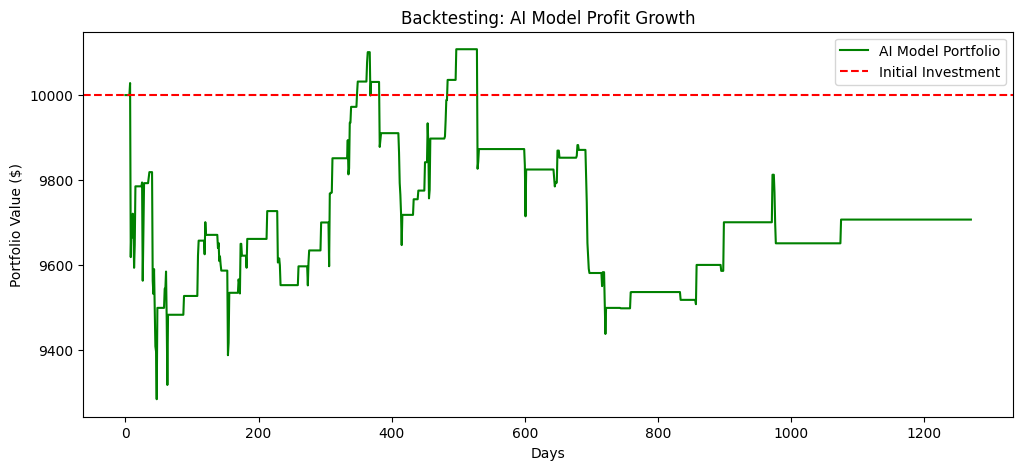

In [9]:

initial_balance = 10000
balance = initial_balance
gold_held = 0
in_market = False

equity_curve = []

print(f"Starting Balance: ${balance}")
print("--------------------------------------------------")


for i in range(len(predicted_prices) - 1):

    current_price = y_test[i]

    next_predicted = predicted_prices[i+1][0]


    if next_predicted > current_price and not in_market:
        gold_held = balance / current_price
        balance = 0
        in_market = True



    elif next_predicted < current_price and in_market:
        balance = gold_held * current_price
        gold_held = 0
        in_market = False

    if in_market:
        current_equity = gold_held * current_price
    else:
        current_equity = balance

    equity_curve.append(current_equity)


if in_market:
    balance = gold_held * y_test[-1]

profit = balance - initial_balance
roi = (profit / initial_balance) * 100


buy_hold_gold = (initial_balance / y_test[0])
buy_hold_final = buy_hold_gold * y_test[-1]
buy_hold_profit = buy_hold_final - initial_balance

print(f"Final Balance (AI Model): ${balance:.2f}")
print(f"Total Profit/Loss: ${profit:.2f} ({roi:.2f}%)")
print(f"Buy & Hold Profit: ${buy_hold_profit:.2f}")
print("--------------------------------------------------")

if balance > buy_hold_final:
    print("RESULT: Aapka AI Model Market se BEHTAR hai! ")
else:
    print("RESULT: Buy & Hold strategy behtar thi. Model ko improvement chahiye.")

plt.figure(figsize=(12,5))
plt.plot(equity_curve, label='AI Model Portfolio', color='green')
plt.axhline(y=initial_balance, color='r', linestyle='--', label='Initial Investment')
plt.title('Backtesting: AI Model Profit Growth')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

In [10]:
# Training wale code ke end mein ye add karein
model.save('gold_prediction_model.h5')
print("Model saved as 'gold_prediction_model.h5'")

Model saved as 'gold_prediction_model.h5'


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- CONFIGURATION ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60  # Model ko pichle 60 din chahiye hote hain

def calculate_indicators(df):
    # Wahi same logic jo training me use kiya tha
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    # RSI Calculation
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df.dropna(inplace=True) # NaN values hatao
    return df

def predict_future():
    # 1. Load Saved Model
    try:
        model = load_model(MODEL_PATH)
        print(" Model Loaded Successfully!")
    except:
        print(" Error: 'gold_prediction_model.h5' nahi mila. Pehle model train aur save karo.")
        return

    # 2. User Input
    try:
        days_input = int(input("\nKitne din ki prediction chahiye? (Max 30): "))
    except ValueError:
        print("Please number enter karein.")
        return

    if days_input > 30:
        print(" Warning: 30 din se zyada ki prediction accurate nahi hoti. Setting to 30.")
        days_input = 30

    print(f"\nDownloading Latest Gold Data from Yahoo Finance...")

    # Humein pichle 1 saal ka data chahiye taaki EMA 200 calculate ho sake
    end_date = datetime.now()
    start_date = end_date - timedelta(days=400)

    data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)

    if len(data) == 0:
        print(" Internet Error: Data download nahi hua.")
        return

    # Data Prepare karna
    df = data[['Close']].copy()
    df = calculate_indicators(df)

    # Features select karna
    features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
    final_df = df[features]

    # Scaling (0 se 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(final_df.values)

    # Aakhri 60 din ka data uthana (Input for Model)
    last_60_days = scaled_data[-LOOKBACK_DAYS:]
    current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

    predicted_prices = []

    print(f"\nCalculating Prediction for next {days_input} days...")

    # --- PREDICTION LOOP ---
    for i in range(days_input):
        # Predict 1 day
        pred_value = model.predict(current_batch, verbose=0)[0] # Scaled value
        predicted_prices.append(pred_value[0])

        # Next input prepare karna
        # (Hum assume kar rahe hain indicators same rahenge short term ke liye)
        new_row = current_batch[0, -1, :].copy() # Copy last day
        new_row[0] = pred_value[0] # Update price with predicted value

        # Window slide karna (Pehla hatao, naya jodo)
        current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

    # --- OUTPUT RESULT ---
    print("\n" + "="*40)
    print(f" GOLD PRICE PREDICTION ({days_input} DAYS)")
    print("="*40)

    # Current Date se aage ki dates
    last_date = df.index[-1]

    for i, price in enumerate(predicted_prices):
        # Inverse Transform to get Dollar Price
        dummy = np.zeros((1, 4))
        dummy[0, 0] = price
        actual_price = scaler.inverse_transform(dummy)[0, 0]

        next_date = last_date + timedelta(days=i+1)
        # Weekends ko skip karna simple logic ke liye mushkil hai, ye straight dates dikhayega

        print(f"{next_date.strftime('%Y-%m-%d')} : ${actual_price:.2f}")

    print("="*40)
    print("Note: Market volatility (News/War) isme shamil nahi hai.")

if __name__ == "__main__":
    predict_future()

 Model Loaded Successfully!

Kitne din ki prediction chahiye? (Max 30): 30


Calculating Prediction for next 30 days...


/tmp/ipython-input-1729100141.py:56: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)



 GOLD PRICE PREDICTION (30 DAYS)
2026-01-17 : $4372.94
2026-01-18 : $4373.62
2026-01-19 : $4370.16
2026-01-20 : $4363.81
2026-01-21 : $4355.46
2026-01-22 : $4345.80
2026-01-23 : $4335.35
2026-01-24 : $4324.52
2026-01-25 : $4313.62
2026-01-26 : $4302.88
2026-01-27 : $4292.45
2026-01-28 : $4282.42
2026-01-29 : $4272.87
2026-01-30 : $4263.82
2026-01-31 : $4255.27
2026-02-01 : $4247.22
2026-02-02 : $4239.66
2026-02-03 : $4232.57
2026-02-04 : $4225.93
2026-02-05 : $4219.72
2026-02-06 : $4213.91
2026-02-07 : $4208.49
2026-02-08 : $4203.42
2026-02-09 : $4198.69
2026-02-10 : $4194.28
2026-02-11 : $4190.18
2026-02-12 : $4186.35
2026-02-13 : $4182.79
2026-02-14 : $4179.47
2026-02-15 : $4176.38
Note: Market volatility (News/War) isme shamil nahi hai.


In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- SETTINGS ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60

def get_latest_data():
    # FIXED: Data range 400 se badha kar 730 days (2 years) kar di hai
    # Taaki EMA 200 calculate karne ke baad bhi kaafi data bache.
    end_date = datetime.now()
    start_date = end_date - timedelta(days=730)

    print(f"Downloading data from {start_date.date()} to {end_date.date()}...")
    data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)

    # FIXED: Yahoo Finance MultiIndex Issue fix
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    return data

def add_indicators(df):
    df = df.copy()
    # EMA Calculation
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    # RSI Calculation
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Safai: NaN values hatana
    df.dropna(inplace=True)
    return df

def analyze_market(investment, days_limit):
    # 1. Load Model
    try:
        model = load_model(MODEL_PATH)
    except Exception as e:
        print(f"❌ Error: Model load nahi hua. ({e})")
        print("Make sure 'gold_prediction_model.h5' same folder mein hai.")
        return

    print("Checking Market Status... Please wait.")

    # 2. Get Data & Prepare
    try:
        raw_data = get_latest_data()

        if len(raw_data) < 260:
            print(f"❌ Error: Data kam hai (Sirf {len(raw_data)} rows). Internet check karein.")
            return

        df = add_indicators(raw_data)

        # Check: Kya indicators banne ke baad data bacha hai?
        if len(df) < LOOKBACK_DAYS:
            print("❌ Error: Indicator calculation ke baad data khatam ho gaya.")
            return

        current_date = df.index[-1]
        current_price = float(df['Close'].iloc[-1]) # Ensure float

        # Scaling
        features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
        final_df = df[features]
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(final_df.values)

        # Prediction Input (Last 60 days)
        last_60_days = scaled_data[-LOOKBACK_DAYS:]

        # Shape Check
        if last_60_days.shape[0] != LOOKBACK_DAYS:
             print(f"❌ Error: Input shape galat hai. Needed {LOOKBACK_DAYS}, got {last_60_days.shape[0]}")
             return

        current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

        predicted_prices = []

        # Future predict karna
        for i in range(days_limit):
            pred_value = model.predict(current_batch, verbose=0)[0]
            predicted_prices.append(pred_value[0])

            # Next step preparation
            new_row = current_batch[0, -1, :].copy()
            new_row[0] = pred_value[0]
            current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

        # 3. Analyze Best Exit Point
        future_prices_usd = []
        for price in predicted_prices:
            dummy = np.zeros((1, 4))
            dummy[0, 0] = price
            usd_price = scaler.inverse_transform(dummy)[0, 0]
            future_prices_usd.append(usd_price)

        # Strategy Logic
        max_price = max(future_prices_usd)
        min_price = min(future_prices_usd)
        max_day_index = future_prices_usd.index(max_price)
        min_day_index = future_prices_usd.index(min_price)

        trend = "NEUTRAL"
        exit_price = current_price
        exit_day = 0

        # Sensitivity thoda adjust kiya hai (0.5% movement check)
        if max_price > current_price * 1.005:
            trend = "BUY (Long)"
            exit_price = max_price
            exit_day = max_day_index + 1
        elif min_price < current_price * 0.995:
            trend = "SELL (Short)"
            exit_price = min_price
            exit_day = min_day_index + 1
        else:
            trend = "HOLD (No Trade)"

        # 4. Profit Calculation
        units = investment / current_price

        if "BUY" in trend:
            final_value = units * exit_price
            profit = final_value - investment
            color_code = "\033[92m" # Green
        elif "SELL" in trend:
            profit = (current_price - exit_price) * units
            final_value = investment + profit
            color_code = "\033[91m" # Red
        else:
            profit = 0
            final_value = investment
            color_code = "\033[93m" # Yellow

        exit_date_obj = current_date + timedelta(days=exit_day)

        # --- FINAL REPORT ---
        print("\n" + "="*50)
        print(f"🤖 AI TRADING ADVISOR REPORT")
        print("="*50)
        print(f"Investment Amount : ${investment}")
        print(f"Current Gold Price: ${current_price:.2f}")
        print("-" * 50)
        print(f"AI RECOMMENDATION : {color_code}{trend}\033[0m")

        if "HOLD" not in trend:
            print(f"Entry Time        : NOW ({current_date.strftime('%Y-%m-%d')})")
            print(f"Best Exit Time    : {exit_date_obj.strftime('%Y-%m-%d')} (Day {exit_day})")
            print(f"Target Exit Price : ${exit_price:.2f}")
            print("-" * 50)
            print(f"Projected Value   : ${final_value:.2f}")
            print(f"Est. Profit/Loss  : {color_code}${profit:.2f}\033[0m")
        else:
            print("Reason: Market volatile nahi hai ya trend clear nahi hai.")
            print("Suggestion: Aaj trade mat karo.")
        print("="*50)

    except Exception as e:
        print(f"\n❌ UNEXPECTED ERROR: {e}")
        import traceback
        traceback.print_exc()

# --- RUN THE BOT ---
if __name__ == "__main__":
    try:
        print("--- Gold AI Bot Starting ---")
        amt_input = input("Enter Investment Amount (USD): ")
        if not amt_input: amt_input = 100 # Default
        amt = float(amt_input)

        days_input = input("Max Holding Days (e.g., 30): ")
        if not days_input: days_input = 30 # Default
        days = int(days_input)

        analyze_market(amt, days)

    except ValueError:
        print("\n⚠️ Please enter VALID numbers only.")
    except KeyboardInterrupt:
        print("\nStopped by user.")

--- Gold AI Bot Starting ---
Enter Investment Amount (USD): 100
Max Holding Days (e.g., 30): 2


/tmp/ipython-input-3355239159.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)


Checking Market Status... Please wait.

🤖 AI TRADING ADVISOR REPORT
Investment Amount : $100.0
Current Gold Price: $4588.40
--------------------------------------------------
AI RECOMMENDATION : SELL (Short)
Entry Time        : NOW (2026-01-16)
Best Exit Time    : 2026-01-18 (Day 2)
Target Exit Price : $4310.57
--------------------------------------------------
Projected Value   : $106.06
Est. Profit/Loss  : $6.06


In [19]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- SETTINGS ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60

def get_latest_data():
    # 2 saal ka data download (Safe side ke liye)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=730)

    print(f"Downloading Market Data...")
    data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)

    # Yahoo Finance MultiIndex fix
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    return data

def add_indicators(df):
    df = df.copy()
    # Indicators
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df.dropna(inplace=True)
    return df

def analyze_market(investment, leverage, days_limit):
    # 1. Load Model
    try:
        model = load_model(MODEL_PATH)
    except:
        print(f"Error: 'gold_prediction_model.h5' nahi mila.")
        return

    print("AI Calculating Entry, Exit & Lot Size...")

    # 2. Prepare Data
    try:
        raw_data = get_latest_data()
        if len(raw_data) < 260:
            print("Data insufficient.")
            return

        df = add_indicators(raw_data)
        current_date = df.index[-1]
        current_price = float(df['Close'].iloc[-1])

        # Scaling
        features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(df[features].values)

        last_60_days = scaled_data[-LOOKBACK_DAYS:]
        current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

        # 3. Predict Future
        predicted_prices = []
        for i in range(days_limit):
            pred_value = model.predict(current_batch, verbose=0)[0]
            predicted_prices.append(pred_value[0])

            new_row = current_batch[0, -1, :].copy()
            new_row[0] = pred_value[0]
            current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

        # Convert to USD
        future_prices_usd = []
        for price in predicted_prices:
            dummy = np.zeros((1, 4))
            dummy[0, 0] = price
            future_prices_usd.append(scaler.inverse_transform(dummy)[0, 0])

        # 4. Strategy & Logic
        max_price = max(future_prices_usd)
        min_price = min(future_prices_usd)

        trend = "NEUTRAL"
        stop_loss = 0.0
        take_profit = 0.0
        exit_day = 0

        # Threshold: 0.5% movement
        if max_price > current_price * 1.005:
            trend = "BUY (Long)"
            take_profit = max_price
            exit_day = future_prices_usd.index(max_price) + 1
            # Stop Loss: Recent Low or 1% below
            stop_loss = current_price * 0.99

        elif min_price < current_price * 0.995:
            trend = "SELL (Short)"
            take_profit = min_price
            exit_day = future_prices_usd.index(min_price) + 1
            # Stop Loss: Recent High or 1% above
            stop_loss = current_price * 1.01

        # 5. LOT SIZE CALCULATION
        # Buying Power = Paisa * Leverage
        buying_power = investment * leverage

        # Total Units (Ounces)
        units = buying_power / current_price

        # Standard Lots (1 Lot = 100 Ounces)
        standard_lots = units / 100

        # Profit Calculation
        if "BUY" in trend:
            price_diff = take_profit - current_price
            est_profit = price_diff * units
            color = "\033[92m" # Green
        elif "SELL" in trend:
            price_diff = current_price - take_profit
            est_profit = price_diff * units
            color = "\033[91m" # Red
        else:
            est_profit = 0
            color = "\033[93m" # Yellow

        exit_date_obj = current_date + timedelta(days=exit_day)

        # --- FINAL TRADING SIGNAL ---
        print("\n" + "="*50)
        print(f"AI TRADING SIGNAL PRO")
        print("="*50)
        print(f"Current Price    : ${current_price:.2f}")
        print(f"Your Balance     : ${investment}")
        print(f"Leverage Used    : 1:{leverage}")
        print("-" * 50)

        if trend == "NEUTRAL":
             print(f"{color}SIGNAL: NO TRADE (Market Flat hai){color}")
        else:
            print(f"SIGNAL           : {color}open {trend}{color}")
            print(f"Entry Price      : ${current_price:.2f} (NOW)")
            print("-" * 50)
            print(f" STOP LOSS     : ${stop_loss:.2f}")
            print(f" TAKE PROFIT   : ${take_profit:.2f}")
            print(f" EXIT TIME     : {exit_date_obj.strftime('%Y-%m-%d')} (in {exit_day} days)")
            print("-" * 50)
            print(f" LOT SIZE      : {standard_lots:.2f} Standard Lots")
            print(f"                   ({units:.2f} Ounces)")
            print("-" * 50)
            print(f"Est. Profit      : {color}${est_profit:.2f}{color}")

            # Risk Warning
            risk_amount = abs(current_price - stop_loss) * units
            print(f"Risk (Loss if SL hit): -${risk_amount:.2f}")

        print("="*50)

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    try:
        amt = float(input("Balance (USD): "))
        lev = float(input("Leverage (e.g. 100, 200, 500): "))
        days = int(input("Max Days to Hold (e.g. 15): "))

        analyze_market(amt, lev, days)
    except ValueError:
        print("Sahi number daalo bhai.")

Balance (USD): 100
Leverage (e.g. 100, 200, 500): 300
Max Days to Hold (e.g. 15): 2


/tmp/ipython-input-3741909559.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)


AI Calculating Entry, Exit & Lot Size...

AI TRADING SIGNAL PRO
Current Price    : $4588.40
Your Balance     : $100.0
Leverage Used    : 1:300.0
--------------------------------------------------
SIGNAL           : open SELL (Short)
Entry Price      : $4588.40 (NOW)
--------------------------------------------------
 STOP LOSS     : $4634.28
 TAKE PROFIT   : $4310.57
 EXIT TIME     : 2026-01-18 (in 2 days)
--------------------------------------------------
 LOT SIZE      : 0.07 Standard Lots
                   (6.54 Ounces)
--------------------------------------------------
Est. Profit      : $1816.52
Risk (Loss if SL hit): -$300.00


In [22]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- SETTINGS ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60

# RISK MANAGEMENT SETTINGS (Isse chhedna mat agar safe khelna hai)
RISK_PER_TRADE = 0.03  # Hum account ka sirf 3% risk lenge ek trade par
MAX_LEVERAGE_CAP = 200 # Broker agar 500 deta hai tab bhi hum max 200 use karenge

def get_latest_data():
    end_date = datetime.now()
    start_date = end_date - timedelta(days=730)
    print(f"Reading Market Data...")
    data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    return data

def add_indicators(df):
    df = df.copy()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df.dropna(inplace=True)
    return df

def calculate_smart_leverage(entry_price, stop_loss, balance, risk_percent):
    """
    Ye function calculate karega ki SL hit hone par sirf fixed % loss ho.
    Us hisab se leverage batayega.
    """
    if entry_price == stop_loss: return 1 # Avoid division by zero

    # 1. Hum kitna paisa khone ko taiyar hain? (e.g. $100 ka 3% = $3)
    risk_amount = balance * risk_percent

    # 2. Per Ounce kitna loss hoga agar SL hit hua?
    price_difference = abs(entry_price - stop_loss)

    # 3. Humein kitna Gold (Ounces) khareedna chahiye taaki loss $3 hi ho?
    position_size_ounces = risk_amount / price_difference

    # 4. Is quantity ki Total Value kya hai?
    total_position_value = position_size_ounces * entry_price

    # 5. Leverage = Total Value / Hamara Paisa
    required_leverage = total_position_value / balance

    # Cap leverage (safety ke liye)
    if required_leverage > MAX_LEVERAGE_CAP:
        required_leverage = MAX_LEVERAGE_CAP

    if required_leverage < 1:
        required_leverage = 1

    return required_leverage, position_size_ounces

def analyze_market(investment, days_limit):
    try:
        model = load_model(MODEL_PATH)
    except:
        print(f" Error: 'gold_prediction_model.h5' nahi mila.")
        return

    print("AI analyzing trend & calculating risk...")

    # Data Process
    raw_data = get_latest_data()
    if len(raw_data) < 260:
        print("Error: Data insufficient.")
        return

    df = add_indicators(raw_data)

    current_price = float(df['Close'].iloc[-1])

    # Prediction Logic
    features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features].values)

    last_60_days = scaled_data[-LOOKBACK_DAYS:]
    current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

    predicted_prices_usd = []

    # Future Loop
    for i in range(days_limit):
        pred = model.predict(current_batch, verbose=0)[0]

        # Inverse dummy
        dummy = np.zeros((1, 4))
        dummy[0, 0] = pred[0]
        usd_val = scaler.inverse_transform(dummy)[0, 0]
        predicted_prices_usd.append(usd_val)

        # Update batch
        new_row = current_batch[0, -1, :].copy()
        new_row[0] = pred[0]
        current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

    # Strategy
    max_p = max(predicted_prices_usd)
    min_p = min(predicted_prices_usd)

    trend = "NEUTRAL"
    stop_loss = 0.0
    take_profit = 0.0

    # Threshold Logic
    if max_p > current_price * 1.006:
        trend = "BUY"
        take_profit = max_p
        stop_loss = min(predicted_prices_usd) if min(predicted_prices_usd) < current_price else current_price * 0.99
    elif min_p < current_price * 0.994:
        trend = "SELL"
        take_profit = min_p
        stop_loss = max(predicted_prices_usd) if max(predicted_prices_usd) > current_price else current_price * 1.01

    print("\n" + "="*50)
    print(f" AI STRATEGY REPORT")
    print("="*50)

    if trend == "NEUTRAL":
        print("SIGNAL: NO TRADE (Market sideways hai)")
        return

    # --- AUTO LEVERAGE CALCULATION ---
    rec_leverage, qty_ounces = calculate_smart_leverage(current_price, stop_loss, investment, RISK_PER_TRADE)

    # Adjust Quantity based on Leverage Limit
    if rec_leverage == MAX_LEVERAGE_CAP:
        qty_ounces = (investment * MAX_LEVERAGE_CAP) / current_price
        print(" Warning: Leverage capped at 200x.")

    # Lots calculation
    standard_lots = qty_ounces / 100
    micro_lots = standard_lots * 100 # 1 Standard = 100 Micro Lots

    # Risk Calc
    risk_amt = abs(current_price - stop_loss) * qty_ounces
    profit_amt = abs(current_price - take_profit) * qty_ounces

    color = "\033[92m" if trend == "BUY" else "\033[91m"
    reset = "\033[0m"

    print(f"Action        : {color}OPEN {trend} NOW{reset}")
    print(f"Current Price : ${current_price:.2f}")
    print("-" * 50)
    print(f" STOP LOSS    : ${stop_loss:.2f}")
    print(f" TAKE PROFIT  : ${take_profit:.2f}")
    print("-" * 50)
    print(f"AI LEVERAGE         : {color}{rec_leverage:.1f}x{reset}")

    # Display Logic (Standard vs Micro)
    if standard_lots < 0.01:
        print(f"  Capital Low ($100). Using Micro Lots:")
        print(f" Trade Size          : {micro_lots:.2f} Micro Lots")
        print(f"   (Broker me 0.01 lot minimum hota hai, ye uske barabar hai)")
    else:
        print(f" Trade Size          : {standard_lots:.2f} Standard Lots")

    print("-" * 50)
    print(f"Potential Profit : ${profit_amt:.2f}")
    print(f"Max Risk (Loss)  : ${risk_amt:.2f} (Only {RISK_PER_TRADE*100}% of Balance)")
    print("="*50)

if __name__ == "__main__":
    try:
        amt = float(input("Enter Balance (USD): "))
        days = int(input("Prediction Days (e.g. 15): "))
        analyze_market(amt, days)
    except ValueError:
        print("Invalid input.")

Enter Balance (USD): 10
Prediction Days (e.g. 15): 2


/tmp/ipython-input-680091483.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)


AI analyzing trend & calculating risk...
Reading Market Data...

 AI STRATEGY REPORT
Action        : OPEN SELL NOW
Current Price : $4588.40
--------------------------------------------------
 STOP LOSS    : $4634.28
 TAKE PROFIT  : $4310.57
--------------------------------------------------
AI LEVERAGE         : 3.0x
  Capital Low ($100). Using Micro Lots:
 Trade Size          : 0.01 Micro Lots
   (Broker me 0.01 lot minimum hota hai, ye uske barabar hai)
--------------------------------------------------
Potential Profit : $1.82
Max Risk (Loss)  : $0.30 (Only 3.0% of Balance)


Kitne din ka Graph dekhna hai? (e.g. 15): 100


/tmp/ipython-input-184800405.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)


Fetching data & generating graph...
Graph Generated! Window open ho gayi hogi.


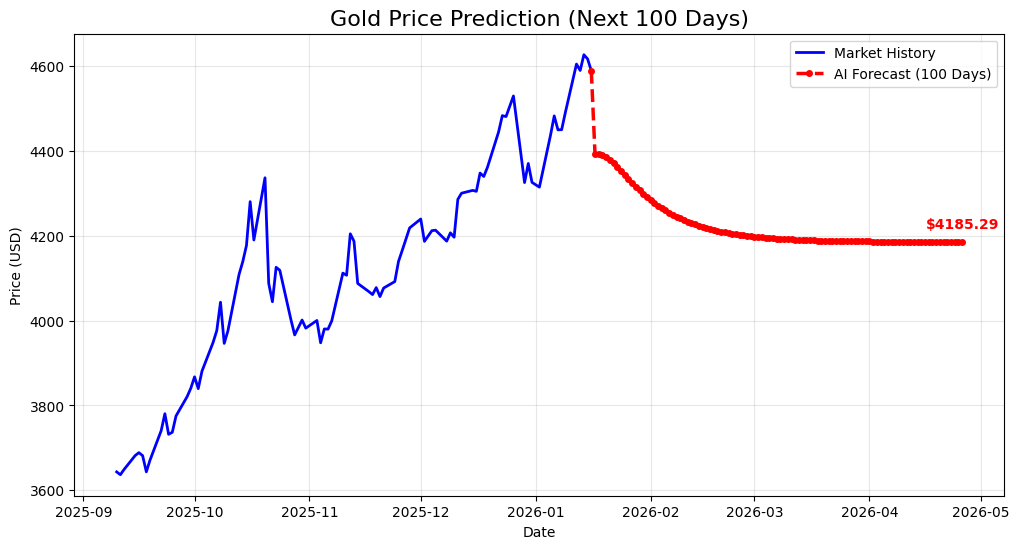

In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- SETTINGS ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60

def get_data_and_predict(days_to_predict):
    # 1. Load Model
    try:
        model = load_model(MODEL_PATH)
    except:
        print("❌ Error: Model file nahi mili.")
        return None, None, None

    # 2. Get Data (Pichle 1 saal ka)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)
    print("Fetching data & generating graph...")

    data = yf.download(TICKER, start=start_date, end=end_date, interval="1d", progress=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    # 3. Add Indicators (Wahi same logic)
    df = data.copy()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df.dropna(inplace=True)

    # 4. Prepare for Prediction
    features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features].values)

    last_60_days = scaled_data[-LOOKBACK_DAYS:]
    current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

    predicted_prices = []

    # 5. Prediction Loop
    for i in range(days_to_predict):
        pred_value = model.predict(current_batch, verbose=0)[0]
        predicted_prices.append(pred_value[0])
        new_row = current_batch[0, -1, :].copy()
        new_row[0] = pred_value[0]
        current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

    # Convert Predictions to USD
    future_prices_usd = []
    for price in predicted_prices:
        dummy = np.zeros((1, 4))
        dummy[0, 0] = price
        future_prices_usd.append(scaler.inverse_transform(dummy)[0, 0])

    return df, future_prices_usd

def plot_graph(days=30):
    history_df, future_prices = get_data_and_predict(days)

    if history_df is None: return

    # Dates generate karna future ke liye
    last_date = history_df.index[-1]
    future_dates = [last_date + timedelta(days=i+1) for i in range(len(future_prices))]

    # Graph ko connect karne ke liye (Aaj ka price future line me jodna)
    future_dates.insert(0, last_date)
    future_prices.insert(0, history_df['Close'].iloc[-1])

    # Trend Color Logic
    trend_color = 'green' if future_prices[-1] > future_prices[0] else 'red'

    # --- PLOTTING ---
    plt.figure(figsize=(12, 6))

    # 1. Past Data (Sirf last 3 months dikhayenge taaki clear dikhe)
    display_history = history_df.tail(90)
    plt.plot(display_history.index, display_history['Close'], label='Market History', color='blue', linewidth=2)

    # 2. Future Prediction
    plt.plot(future_dates, future_prices, label=f'AI Forecast ({days} Days)', color=trend_color, linestyle='--', linewidth=2.5, marker='o', markersize=4)

    # 3. Beautification
    plt.title(f"Gold Price Prediction (Next {days} Days)", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Last Price Tag
    final_price = future_prices[-1]
    plt.annotate(f"${final_price:.2f}", (future_dates[-1], final_price), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, fontweight='bold', color=trend_color)

    print(f"Graph Generated! Window open ho gayi hogi.")
    plt.show()

if __name__ == "__main__":
    try:
        d = int(input("Kitne din ka Graph dekhna hai? (e.g. 15): "))
        plot_graph(d)
    except ValueError:
        print("Number daalo bhai.")

Kitne din ka Graph dekhna hai? (e.g. 15): 100


/tmp/ipython-input-1720659462.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(TICKER, period="2y", interval="1d", progress=False)


Fetching Latest Data (including Today)...
✅ Latest Market Data Date: 2026-01-16
Graph Generated! Window open ho gayi hogi.


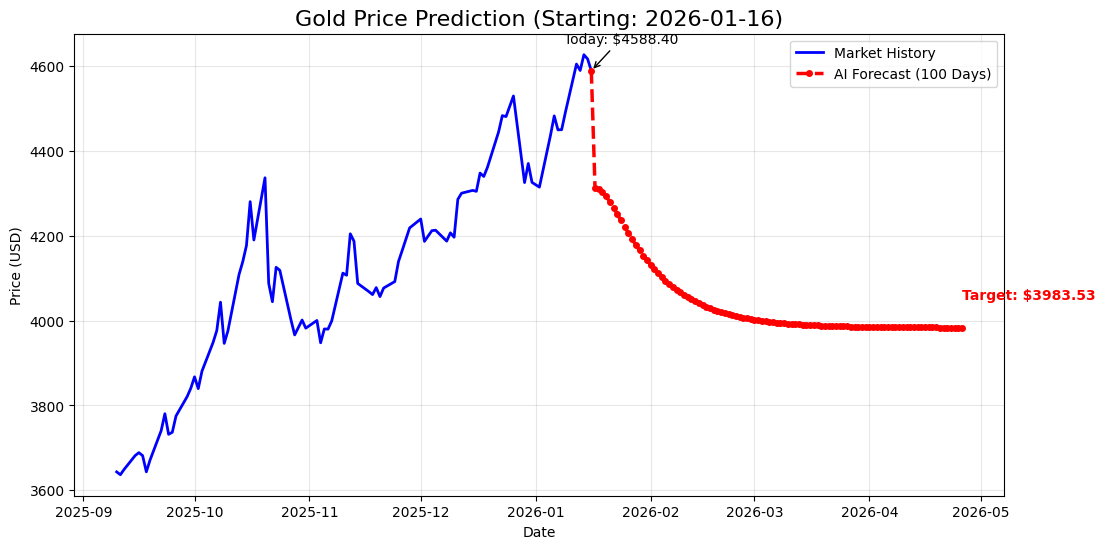

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

# --- SETTINGS ---
MODEL_PATH = 'gold_prediction_model.h5'
TICKER = "GC=F"
LOOKBACK_DAYS = 60

def get_data_and_predict(days_to_predict):
    # 1. Load Model
    try:
        model = load_model(MODEL_PATH)
    except:
        print("❌ Error: Model file nahi mili.")
        return None, None, None

    print("Fetching Latest Data (including Today)...")

    # --- UPDATE: DATE FIX ---
    # Hum start/end date ki jagah 'period' use karenge.
    # period='2y' ka matlab pichle 2 saal se lekar AAJ tak ka sab kuch.
    data = yf.download(TICKER, period="2y", interval="1d", progress=False)

    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    # Check: Print latest date found
    last_market_date = data.index[-1].strftime('%Y-%m-%d')
    print(f"✅ Latest Market Data Date: {last_market_date}")

    # 3. Add Indicators
    df = data.copy()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()
    df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()

    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df.dropna(inplace=True)

    # 4. Prepare for Prediction
    features = ['Close', 'RSI', 'EMA_50', 'EMA_200']
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features].values)

    last_60_days = scaled_data[-LOOKBACK_DAYS:]
    current_batch = last_60_days.reshape((1, LOOKBACK_DAYS, 4))

    predicted_prices = []

    # 5. Prediction Loop
    for i in range(days_to_predict):
        pred_value = model.predict(current_batch, verbose=0)[0]
        predicted_prices.append(pred_value[0])
        new_row = current_batch[0, -1, :].copy()
        new_row[0] = pred_value[0]
        current_batch = np.append(current_batch[:, 1:, :], [[new_row]], axis=1)

    # Convert to USD
    future_prices_usd = []
    for price in predicted_prices:
        dummy = np.zeros((1, 4))
        dummy[0, 0] = price
        future_prices_usd.append(scaler.inverse_transform(dummy)[0, 0])

    return df, future_prices_usd

def plot_graph(days=30):
    history_df, future_prices = get_data_and_predict(days)

    if history_df is None: return

    # Dates generate karna future ke liye
    last_date = history_df.index[-1]
    future_dates = [last_date + timedelta(days=i+1) for i in range(len(future_prices))]

    # Connect graph lines
    future_dates.insert(0, last_date)
    future_prices.insert(0, history_df['Close'].iloc[-1])

    trend_color = 'green' if future_prices[-1] > future_prices[0] else 'red'

    # --- PLOTTING ---
    plt.figure(figsize=(12, 6))

    # 1. Past Data (Last 3 Months)
    display_history = history_df.tail(90)
    plt.plot(display_history.index, display_history['Close'], label='Market History', color='blue', linewidth=2)

    # 2. Future Prediction
    plt.plot(future_dates, future_prices, label=f'AI Forecast ({days} Days)', color=trend_color, linestyle='--', linewidth=2.5, marker='o', markersize=4)

    # 3. Beautification
    plt.title(f"Gold Price Prediction (Starting: {last_date.date()})", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Annotations
    start_p = future_prices[0]
    end_p = future_prices[-1]

    plt.annotate(f"Today: ${start_p:.2f}", (future_dates[0], start_p), xytext=(-20, 20), textcoords="offset points", arrowprops=dict(arrowstyle="->"))
    plt.annotate(f"Target: ${end_p:.2f}", (future_dates[-1], end_p), xytext=(0, 20), textcoords="offset points", fontweight='bold', color=trend_color)

    print(f"Graph Generated! Window open ho gayi hogi.")
    plt.show()

if __name__ == "__main__":
    try:
        d = int(input("Kitne din ka Graph dekhna hai? (e.g. 15): "))
        plot_graph(d)
    except ValueError:
        print("Number daalo bhai.")